In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pylab as py 
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/naweedahmed/Desktop/project_3/pin3/winemag-data_first150k.csv')

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [5]:
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [21]:
continent = []
North_America = ['US','Canada']
Europe = ['Slovakia','Czech Republic','Georgia','Montenegro','Luxembourg','England','Ukraine','Cyprus', 'Lithuania','Switzerland', 'Albania', 'Bosnia and Herzegovina','Serbia','Turkey', 'Macedonia','Spain', 'France', 'Italy', 'Bulgaria','Portugal','Greece', 'Romania', 'Germany',  'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia']
South_America = [ 'Mexico','Brazil','Uruguay','Argentina','Chile']
Oceania = ['New Zealand','Australia']
Asia = ['Japan', 'China', 'South Korea','Israel', 'India', 'Lebanon']
Africa = ['Egypt', 'Tunisia','South Africa', 'Morocco']




In [22]:
def get_cont(c):
    if c in Asia:
        return "Asia"
    elif c in Europe:
        return "Europe"
    elif c in North_America:
        return "North America"
    elif c in Oceania:
        return "Oceania"
    elif c in Africa:
        return "Africa"
    elif c in South_America:
        return "South America"
    else:
        return "Other"
df['continent'] = df['country'].apply(lambda x: get_cont(x))

In [23]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,continent
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,North America
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Europe
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,North America
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,North America
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,Europe


In [24]:
df_other = df[df['continent']=='Other']

In [26]:
len(df_other)

6

In [27]:
df.dropna(subset=['country','price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [28]:
df.isna().sum()

Unnamed: 0         0
country            0
description        0
designation    42311
points             0
price              0
province           0
region_1       22837
region_2       76526
variety            0
winery             0
continent          0
dtype: int64

In [30]:
df_asia = df[df.continent == 'Asia']['price']

In [31]:
df_africa = df[df.continent == 'Africa']['price']

In [32]:
len(df_asia)

664

In [34]:
df_asia.describe()

count    664.000000
mean      30.588855
std       19.285376
min        7.000000
25%       18.000000
50%       25.000000
75%       39.250000
max      150.000000
Name: price, dtype: float64

In [33]:
len(df_africa)

2249

In [35]:
df_africa.describe()

count    2249.000000
mean       21.118275
std        14.221283
min         5.000000
25%        12.000000
50%        16.000000
75%        25.000000
max       145.000000
Name: price, dtype: float64

In [89]:
sample_asia_price = df_asia.sample(n = 200)

In [90]:
sample_africa_price = df_africa.sample(n=200)

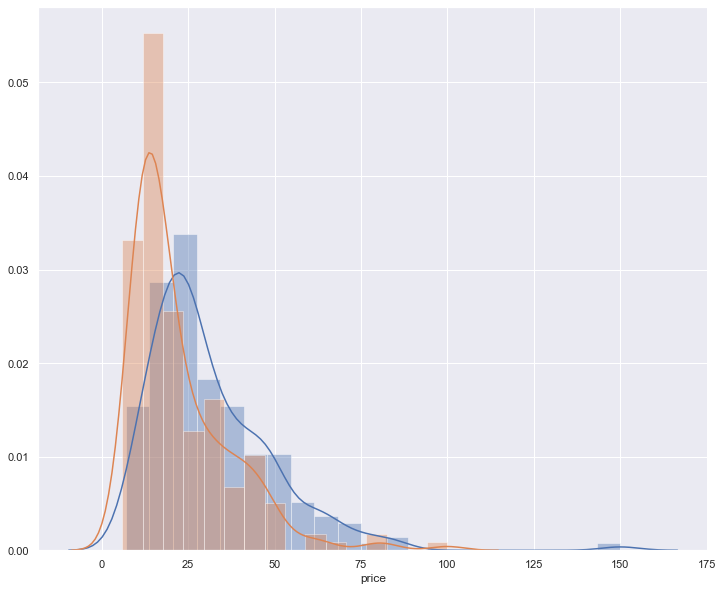

In [91]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample_asia_price) 
sns.distplot(sample_africa_price) 

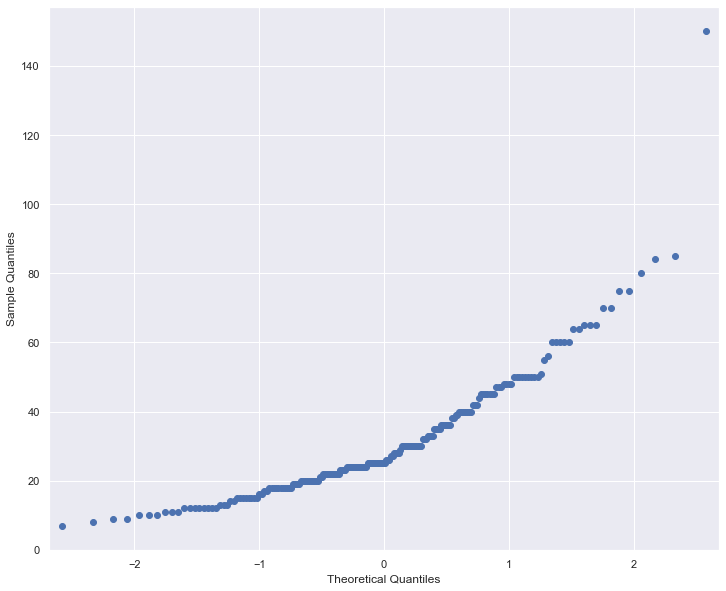

In [92]:
sm.qqplot(sample_asia_price) 
py.show() 

In [93]:
stats.normaltest(sample_asia_price)

NormaltestResult(statistic=108.95655963481641, pvalue=2.1896953278537705e-24)

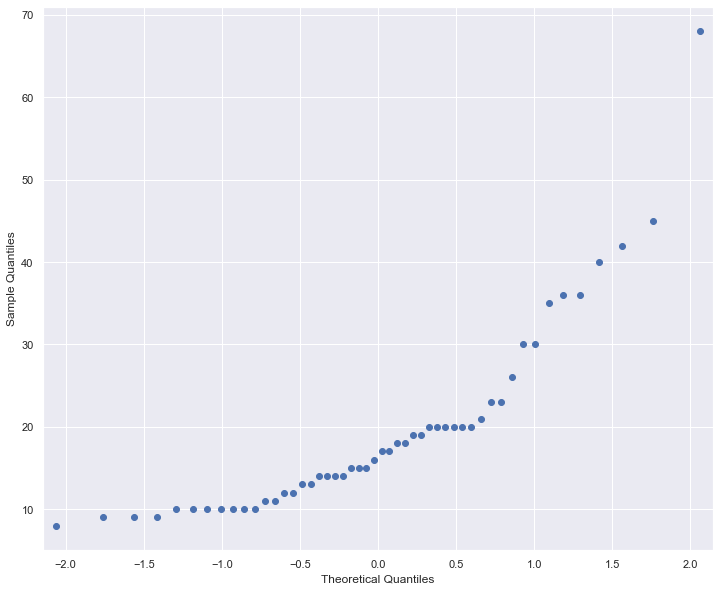

In [63]:
sm.qqplot(sample_africa_price) 
py.show() 

In [96]:
sample_asia_price = pd.DataFrame(sample_asia_price)

In [97]:
sample_asia_price.head()

,price
42064,30.0
32824,51.0
29916,33.0
93085,22.0
94497,39.0


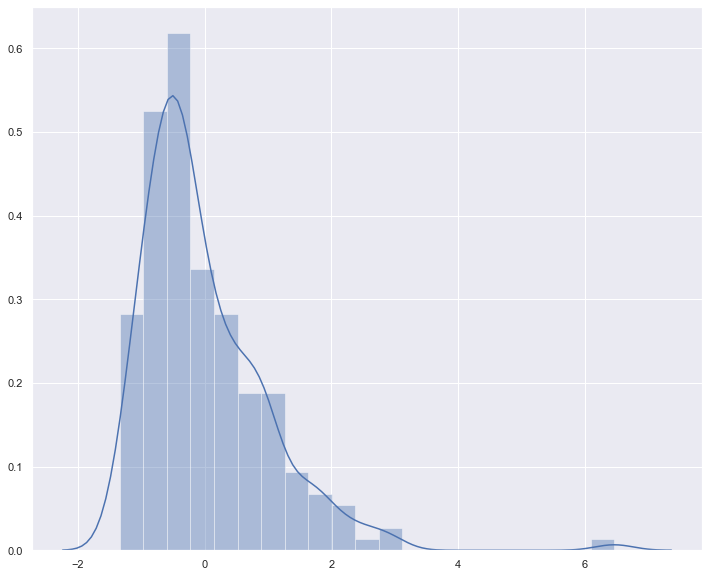

In [98]:
z_asia_price = [(x-sample_asia_price['price'].mean())/sample_asia_price['price'].std() for x in sample_asia_price['price']]
sns.distplot(z_asia_price)

In [99]:
sample_africa_price = pd.DataFrame(sample_africa_price)

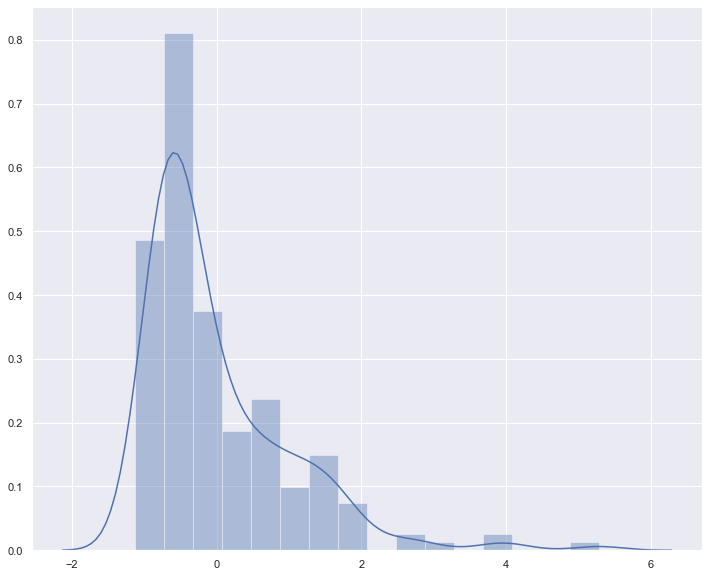

In [100]:
z_africa_price = [(x-sample_africa_price['price'].mean())/sample_africa_price['price'].std() for x in sample_africa_price['price']]
sns.distplot(z_africa_price)

In [103]:
stats.normaltest(z_asia_price)

NormaltestResult(statistic=108.95655963481639, pvalue=2.189695327853802e-24)

In [104]:
stats.normaltest(z_africa_price)

NormaltestResult(statistic=94.08917801978589, pvalue=3.7050544054862936e-21)

In [105]:
stats.ttest_ind(z_asia_price, z_africa_price)

Ttest_indResult(statistic=-7.771561172376099e-16, pvalue=0.9999999999999993)

In [106]:
t_stat_price = twosample_tstatistic(z_asia_price, z_africa_price)
t_stat_price

-7.771561172376099e-16

In [107]:
t_crit = stats.t.ppf(1-0.025, (len(z_asia_price)+len(z_africa_price)-2))
t_crit

1.9659423239761926

In [69]:
df_europe_points = pd.DataFrame(df[df.continent == 'Europe']['points'])

In [70]:
df_row_points = pd.DataFrame(df[df.continent != 'Europe']['points'])

In [73]:
sample_europe_points = df_europe_points.sample(n = 100)
sample_row_points = df_row_points.sample(n=100)

In [74]:
stats.normaltest(sample_europe_points)

NormaltestResult(statistic=array([0.337207]), pvalue=array([0.84484382]))

In [75]:
stats.normaltest(sample_row_points)

NormaltestResult(statistic=array([4.8426086]), pvalue=array([0.08880571]))

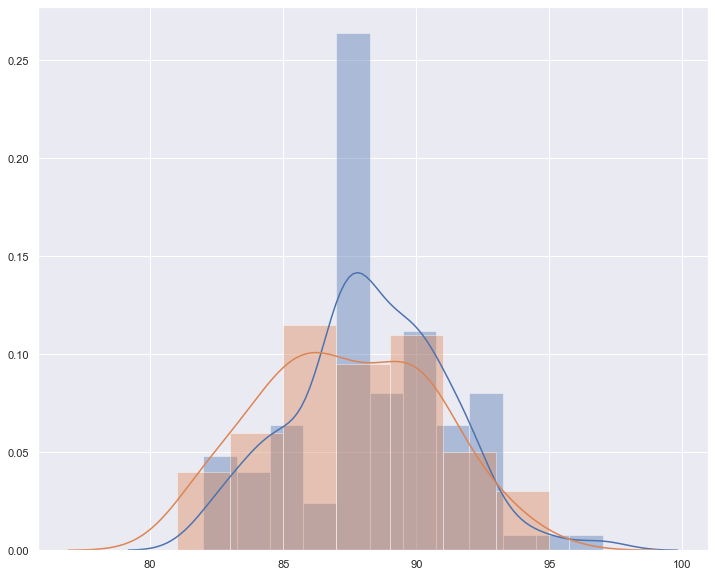

In [77]:
sns.distplot(sample_europe_points)
sns.distplot(sample_row_points)

In [78]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom



In [79]:
t_stat = twosample_tstatistic(sample_europe_points, sample_row_points)
t_stat

points    1.990567
dtype: float64

In [80]:
stats.ttest_ind(sample_europe_points, sample_row_points)

Ttest_indResult(statistic=array([1.99056707]), pvalue=array([0.04790393]))

In [81]:
t_crit = stats.t.ppf(1-0.025, (len(sample_europe_points)+len(sample_row_points)-2))
t_crit

1.9720174778338955

In [113]:
df_europe = df[df.continent =='Europe']['price']

In [114]:
sample_europe_price = df_europe.sample(n = 100)

In [115]:
stats.ttest_ind(sample_europe_points, sample_europe_price)

Ttest_indResult(statistic=array([19.60511369]), pvalue=array([2.87097956e-48]))

In [189]:
asia_points = df[df.continent == 'Asia']['points']
north_america_points = df[df.continent == 'North America']['points']
europe_points = df[df.continent == 'Europe']['points']
oceania_points = df[df.continent == 'Oceania']['points']
south_america_points = df[df.continent == 'South America']['points']
africa_points = df[df.continent == 'Africa']['points']
world_price = df['price']

In [190]:
sample_asia_points = asia_points.sample(n = 100).reset_index()
sample_africa_points = africa_points.sample(n=100).reset_index()
sample_europe_points = europe_points.sample(n=100).reset_index()
sample_oceania_points = oceania_points.sample(n=100).reset_index()
sample_north_america_points = north_america_points.sample(n=100).reset_index()
sample_south_america_points = south_america_points.sample(n=100).reset_index()
sample_world_price = world_price.sample(n=100).reset_index()

In [191]:
del sample_asia_points['index']
del sample_africa_points['index']
del sample_europe_points['index']
del sample_oceania_points['index']
del sample_north_america_points['index']
del sample_south_america_points['index']
del sample_world_price['index']

In [192]:
sample_asia_points  = sample_asia_points.rename(columns= {'points':'asia_points'})
sample_africa_points = sample_africa_points.rename(columns= {'points':'africa_points'})
sample_europe_points = sample_europe_points.rename(columns= {'points':'europe_points'})
sample_oceania_points = sample_oceania_points.rename(columns= {'points':'oceania_points'})
sample_north_america_points = sample_north_america_points.rename(columns= {'points':'na_points'})
sample_south_america_points = sample_south_america_points.rename(columns= {'points':'sa_points'})
sample_world_price = sample_world_price.rename(columns = {"price":"world_price"})

In [193]:
df_sample_3 = pd.concat([sample_world_price,sample_asia_points, sample_africa_points, sample_europe_points, sample_oceania_points, sample_north_america_points, sample_south_america_points],axis=1)

In [194]:
df_sample_3.head()

,world_price,asia_points,africa_points,europe_points,oceania_points,na_points,sa_points
0,14.0,89,86,86,84,88,86
1,25.0,89,89,87,84,82,85
2,12.0,84,89,92,85,85,85
3,35.0,88,93,84,88,91,88
4,25.0,92,91,86,85,92,88


In [196]:
world_price.describe()

count    137230.000000
mean         33.132019
std          36.323072
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [195]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'world_price ~ + C(asia_points) +C(africa_points) + C(europe_points) + C(oceania_points) + C(na_points) + C(sa_points) '
lm = ols(formula, df_sample_3).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                        sum_sq    df         F    PR(>F)
C(asia_points)     5882.271787  12.0  1.424700  0.219385
C(africa_points)   4408.091010  10.0  1.281180  0.292875
C(europe_points)   9516.465117  16.0  1.728683  0.106723
C(oceania_points)  7924.867901  11.0  2.093915  0.061162
C(na_points)       6312.362178  12.0  1.528869  0.178882
C(sa_points)       7921.783259  13.0  1.771084  0.106508
Residual           8601.621584  25.0       NaN       NaN
